<a href="https://colab.research.google.com/github/bs3537/DS-Unit-4-Sprint-3-Deep-Learning/blob/master/_DeepLearning_Sprint_final_Bhav_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Scientist and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMs

Use an LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [1]:
# Check that we have a GPU instance of Colab
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sat May  2 02:49:56 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [0]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [3]:
y_train[10:]

array([ 9,  8,  4, ..., 19,  3, 11])

In [0]:
# Get the word index from the dataset
word_index = reuters.get_word_index(path="reuters_word_index.json")

# Ensure that "special" words are mapped into human readable terms 
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

# Perform reverse word lookup and make it callable
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [5]:
# Concatonate test and training datasets
import numpy as np

allarticles = np.concatenate((X_train, X_test), axis=0)

# Article lengths across test and training whole datasets
print("Maximum article length: {}".format(len(max((allarticles), key=len))))
print("Minimum article length: {}".format(len(min((allarticles), key=len))))
result = [len(x) for x in allarticles]
print("Mean article length: {}".format(np.mean(result)))

# Print an article and it's class as stored in the dataset. Replace the number
# to select a different review.
print("")
print("Machine readable Article")
print("  Article Text: " + str(X_train[60]))
print("  Article Class: " + str(y_train[60]))

# Print an article and it's class in human readable format. Replace the number
# to select a different review.
print("")
print("Human Readable Article")
print("  Article Text: " + decode_review(X_train[60]))


Maximum article length: 2376
Minimum article length: 2
Mean article length: 145.96419665122906

Machine readable Article
  Article Text: [1, 53, 46, 160, 26, 14, 74, 142, 26, 39, 46, 4312, 4938, 14, 74, 957, 4835, 86, 19, 445, 18, 14, 32, 451, 18, 17, 12]
  Article Class: 3

Human Readable Article
  Article Text: <START> shr loss 11 cts vs profit five cts net loss 279 726 vs profit 76 591 revs 1 300 000 vs 2 200 000 reuter 3


In [6]:
num_classes = max(y_train) + 1
print('Number of Classes: {}'.format(num_classes))

Number of Classes: 46


In [0]:
#Number of categories = 46 in labels

In [8]:
print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 782 in the data
London is encoded as 547 in the data
Words are encoded as numbers in our dataset.


In [9]:
max_features = len(word_index.values()) + 1 # 1 seems added here to make the max_features a number divisible by 8 since I am using batch size of 8 for GPU
max_features

30984

In [0]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout, Conv1D, MaxPooling1D, PReLU

In [0]:
batch_size = 8
maxlen = 2376
num_classes = 46

In [12]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 2376)
X_test shape: (2246, 2376)


RUN 1

In [0]:


#MODEL ARCHITTECTURE= BIDIRECTIONAL LSTM 

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(Bidirectional(LSTM(128))) #**Bidirectional LSTM Layer (RNN)**
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))



In [0]:
import tensorflow
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         3965952   
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 46)                11822     
Total params: 4,240,942
Trainable params: 4,240,942
Non-trainable params: 0
_________________________________________________________________


In [0]:


rlrop = ReduceLROnPlateau(monitor='val_loss', mode='min', min_delta=0.001, factor=0.2, patience=1)
stop = EarlyStopping(monitor='val_loss', mode='min', min_delta=0.001, patience=3, verbose=1)
#filepath="/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/CNNs/data/reuters_LSTM_v1.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min', save_freq='epoch')

In [17]:
print('Train...')
hist = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=30,
          validation_data=(X_test, y_test), callbacks=[stop, rlrop])



Train...
Epoch 1/30
1123/1123 [==============================] - 218s 194ms/step - loss: 1.9430 - accuracy: 0.5125 - val_loss: 1.6881 - val_accuracy: 0.5512 - lr: 0.0010
Epoch 2/30
1123/1123 [==============================] - 217s 193ms/step - loss: 1.6352 - accuracy: 0.5817 - val_loss: 1.6248 - val_accuracy: 0.5962 - lr: 0.0010
Epoch 3/30
1123/1123 [==============================] - 217s 193ms/step - loss: 1.3491 - accuracy: 0.6584 - val_loss: 1.4056 - val_accuracy: 0.6465 - lr: 0.0010
Epoch 4/30
1123/1123 [==============================] - 218s 194ms/step - loss: 1.0778 - accuracy: 0.7256 - val_loss: 1.3538 - val_accuracy: 0.6741 - lr: 0.0010
Epoch 5/30
1123/1123 [==============================] - 217s 193ms/step - loss: 0.8410 - accuracy: 0.7862 - val_loss: 1.4360 - val_accuracy: 0.6808 - lr: 0.0010
Epoch 6/30
1123/1123 [==============================] - 217s 193ms/step - loss: 0.6059 - accuracy: 0.8427 - val_loss: 1.3540 - val_accuracy: 0.6825 - lr: 2.0000e-04
Epoch 7/30
1123/1123 

In [18]:
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

281/281 [==============================] - 17s 62ms/step - loss: 1.3665 - accuracy: 0.6955
Test score: 1.3665215969085693
Test accuracy: 0.6954585909843445


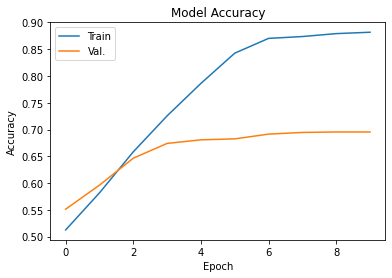

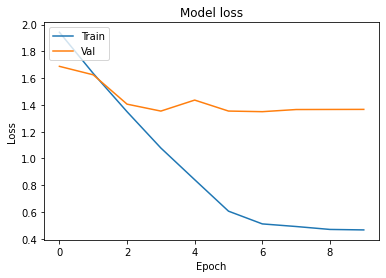

In [19]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

RUN 2

In [20]:
#1 layer LSTM, no bidirectional

lstm = Sequential()
lstm.add(Embedding(max_features, 128))
lstm.add(LSTM(128)) 
lstm.add(Dropout(0.25)) 
lstm.add(Dense(num_classes, activation='softmax'))    
#
lstm.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

lstm.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 128)         3965952   
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                5934      
Total params: 4,103,470
Trainable params: 4,103,470
Non-trainable params: 0
_________________________________________________________________


In [21]:
print('Train...')
hist2 = lstm.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=30,
          validation_data=(X_test, y_test), callbacks=[stop, rlrop])

Train...
Epoch 1/30
1123/1123 [==============================] - 123s 109ms/step - loss: 2.1484 - accuracy: 0.4537 - val_loss: 1.7598 - val_accuracy: 0.5490 - lr: 0.0010
Epoch 2/30
1123/1123 [==============================] - 122s 109ms/step - loss: 1.7155 - accuracy: 0.5636 - val_loss: 1.5970 - val_accuracy: 0.6024 - lr: 0.0010
Epoch 3/30
1123/1123 [==============================] - 122s 109ms/step - loss: 1.5162 - accuracy: 0.6265 - val_loss: 1.4935 - val_accuracy: 0.6287 - lr: 0.0010
Epoch 4/30
1123/1123 [==============================] - 123s 109ms/step - loss: 1.2588 - accuracy: 0.6897 - val_loss: 1.2544 - val_accuracy: 0.6906 - lr: 0.0010
Epoch 5/30
1123/1123 [==============================] - 123s 109ms/step - loss: 1.3205 - accuracy: 0.6706 - val_loss: 1.2517 - val_accuracy: 0.6852 - lr: 0.0010
Epoch 6/30
1123/1123 [==============================] - 123s 109ms/step - loss: 0.8994 - accuracy: 0.7723 - val_loss: 1.1538 - val_accuracy: 0.7146 - lr: 0.0010
Epoch 7/30
1123/1123 [===

In [24]:
score, acc = lstm.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

281/281 [==============================] - 9s 33ms/step - loss: 1.1598 - accuracy: 0.7605
Test score: 1.1597980260849
Test accuracy: 0.7604630589485168


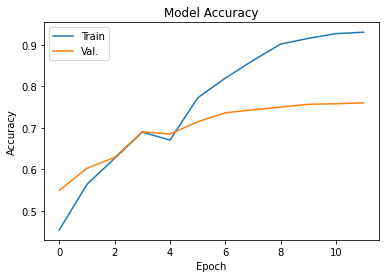

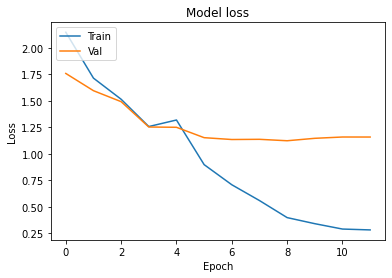

In [25]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt

plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In this dataset, i got higher test accuracy with single LSTM (76%) than bidirectional but it could be due to memory restrictions on single GPU since bidirectional LSTM took almost 20 min to run and needs more memory. I think it can perform better than single LSTM on 2-3 GPUs. I also tried a CNN layer before bidirectional LSTM which ran faster (CNN+bidirectional LSTM) and it ran faster than bi-LSTM only and gave test acc. of 73%. 

Best test accuracy was achieved in these 3 experiments using a single LSTM layer which also had the fastest run. I think on a single GPU, this is the fastest and the best NN architecture for a text classification problem like this and would be easy to compile and deploy. 

The results can be further improved by tuning the learning rate, batch size, the dropout rate, type of optimizer, etc. if I had more time on this assignment. Gridsearch or Hyperas can help in this purpose.

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

Pad sequnce method in Keras is used to pad variable length sequences. It can be used to pad length sequences to a new desired length or or to truncate variable length sequences to a new desired length.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

LSTM have a different architecture than plain RNN like a forget gate. They are able to remember the sequence information better than a plain RNN. We did an example of this in the class on RNNs where the val. accuracy increased significantly on using LSTM vs. RNN. 


## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

1. Text classification
2. Text Generation
3. Time series forecasting
4. Music Generation
5. Handwriting recognition
6. Language translation
7. Image captioning

All these tasks need the neural networks to remember the previous historical sequence of information (e.g. sequence of words in a sentence or text) which LSTM is able to do.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50v2 (pre-trained) to detect which of the images with the frog_images subdirectory has a frog in it. Note: You will need to upload the images to Colab.

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [225]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
from skimage.io import imread_collection
from skimage.transform import resize
import numpy as np
#image path 
test_images = '/content/drive/My Drive/Lambda DS_Unit 4 Deep Learning/Sprint challenge files/resized/*.jpg'
#creating a collection with the available images
X_test = imread_collection(test_images).concatenate()
#X_test = resize(X_test, (15,224,224,3))

In [269]:
X_test.shape

(15, 224, 224, 3)

In [0]:

import matplotlib.pyplot as plt
import os
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

In [0]:
model = ResNet50V2(weights='imagenet')

In [0]:
preds = model.predict(X_test)

In [273]:
preds

array([[0.0000000e+00, 5.7320473e-33, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 2.0550847e-28, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [275]:
preds.shape

(15, 1000)

In [0]:
labels = decode_predictions(preds) 

In [277]:
labels

[[('n02089973', 'English_foxhound', 0.990682),
  ('n02356798', 'fox_squirrel', 0.008893087),
  ('n04254777', 'sock', 0.00042448187),
  ('n07613480', 'trifle', 2.933831e-07),
  ('n02105056', 'groenendael', 2.5014106e-07)],
 [('n02089973', 'English_foxhound', 1.0),
  ('n07613480', 'trifle', 2.8847148e-21),
  ('n02105056', 'groenendael', 1.4885586e-22),
  ('n02356798', 'fox_squirrel', 3.4934255e-27),
  ('n02883205', 'bow_tie', 2.0763707e-37)],
 [('n03706229', 'magnetic_compass', 1.0),
  ('n01688243', 'frilled_lizard', 7.827633e-13),
  ('n02089973', 'English_foxhound', 5.5912736e-14),
  ('n07613480', 'trifle', 6.9167906e-16),
  ('n02356798', 'fox_squirrel', 4.0799684e-16)],
 [('n07613480', 'trifle', 0.9999999),
  ('n02356798', 'fox_squirrel', 9.836181e-08),
  ('n02123597', 'Siamese_cat', 1.3027331e-09),
  ('n01855032', 'red-breasted_merganser', 5.5678717e-10),
  ('n02089973', 'English_foxhound', 7.403126e-17)],
 [('n02089973', 'English_foxhound', 0.9999999),
  ('n07613480', 'trifle', 1.133

PREPROCESS INPUT METHOD

In [0]:
X_test_processed = preprocess_input(X_test)

In [0]:
preds2 = model.predict(X_test_processed)

In [280]:
labels2 = decode_predictions(preds2) 
labels2

[[('n04522168', 'vase', 0.5248559),
  ('n03991062', 'pot', 0.12285488),
  ('n02206856', 'bee', 0.025769163),
  ('n01833805', 'hummingbird', 0.024114514),
  ('n11939491', 'daisy', 0.019627241)],
 [('n01641577', 'bullfrog', 0.96829337),
  ('n02655020', 'puffer', 0.017185627),
  ('n01644900', 'tailed_frog', 0.004709176),
  ('n01667778', 'terrapin', 0.004080356),
  ('n04090263', 'rifle', 0.00042536797)],
 [('n02190166', 'fly', 0.9587819),
  ('n02206856', 'bee', 0.03673792),
  ('n02256656', 'cicada', 0.003765972),
  ('n02259212', 'leafhopper', 0.00023085815),
  ('n02229544', 'cricket', 9.10187e-05)],
 [('n04258138', 'solar_dish', 0.6805334),
  ('n03249569', 'drum', 0.07789603),
  ('n03250847', 'drumstick', 0.039112385),
  ('n04332243', 'strainer', 0.02117694),
  ('n03920288', 'Petri_dish', 0.017550241)],
 [('n11939491', 'daisy', 0.5825262),
  ('n04476259', 'tray', 0.12796682),
  ('n02840245', 'binder', 0.03889601),
  ('n04136333', 'sarong', 0.034323305),
  ('n04209239', 'shower_curtain', 0.

****There are several frog images in the image dataset with labels like bullfrog, tailed frog, and tree frog. Thus, our model was able to identify these images accurately.

The model is returning accurate predictions after applying the ResNetV50 preprocess input function. If we don't apply this function, the model cannot accurately identify the images and labels. This is a very important lesson from this assignment. 

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

An autoencoder can be used for denoising. The code layer helps the autoencoder to learn an intelligent representation of the data and learn its useful features. The denoising autoencoder subtracts the noise and produces meaningful data.
Autoencoders can also be used for sequence to sequence prediction e.g. time series data and text data in combination with LSTM. 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?
- What area of Data Science would you most like to learn more about, and why?
- Where do you think Data Science will be in 5 years?
- What are the threats posed by AI to our society?
- How do you think we can counteract those threats? 
- Do you think achieving General Artifical Intelligence is ever possible?

1. My strongest areas as a data scientist are deep learning (neural networks), NLP and predictive analytics. 
2. I would like to learn more about GANS and reinforcement learning. GANS and reinforcement learning have several useful cases. GANS are used in drug discovery, and I am interested in working in pharma/biotech industry. 
3. Data science is moving towards AutoML, so predictive analytics is becoming easily available to the general population, though a data scientist can do feature engineering, data cleaning and better data visualizations. Also, data engineering and compter science skills will become more important. Deep learning and neural netowrks will have applications in specific industries like self driving cars or big techs like Google, Facebook, etc. However, being good at deep learning can help a data scientist to land a job at a big tech company.
4. AI is posing threats like generation of fake news by text generators at present. The sci fi scenario of intelligent machines or robots that can fight with human and cause their extinction is still though many decades away at the least. Self driving cars are still not perfect and there have been cases where people relied too much on a Tesla with autopilot feature on and slept at the wheel resulting in a fatal car crash. AI is also being used by hackers to weaponize malware and do attacks to ovecome cybersecurity solutions which is another threat.
- Reinforcement learning has shown some signs of AGI being possible. Many companies are working on autonomous drones and robots and some have been successful. AI has shown some ability to beat human ability in games like chess and Go but it is due to the ability of computers to do complex calculations faster than humans. However, the scenario of a machine that can acquire wordly knowledge and perform at human ability in all aspects like vision, language, intellect seems far fetched at present. 

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


Thank you for teaching me all the interesting things. I really appreciate Lambda for the excellent education and thank our instructor Bruno.

In [281]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")